1 => 1
2 => 3
3 => 5
4 => 7
5 => ?
y = 2*x - 1 
# Machine Learning- We would like the machine to find the pattern in our data and predict the right value correponding to 5
## Simple example of how Linear Regression works in ML

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model as LinearRegression

In [19]:
x = np.array([[1], [2], [3], [4]])
y = np.array([[1], [3], [5], [7]])

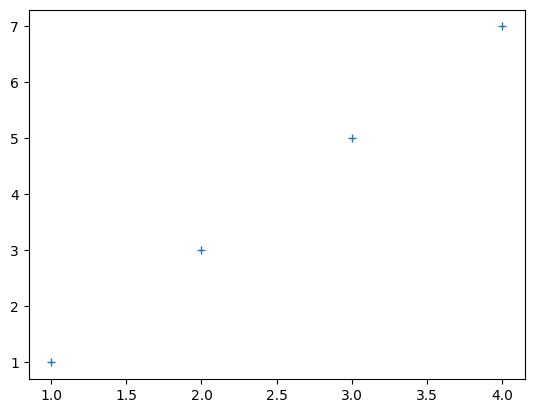

In [20]:
plt.plot(x, y, '+')
plt.show()

In [32]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [33]:
coefficient = model.coef_[0]
intercept = model.intercept_

In [34]:
print(coefficient, intercept)

[2.] [-1.]


<function matplotlib.pyplot.show(close=None, block=None)>

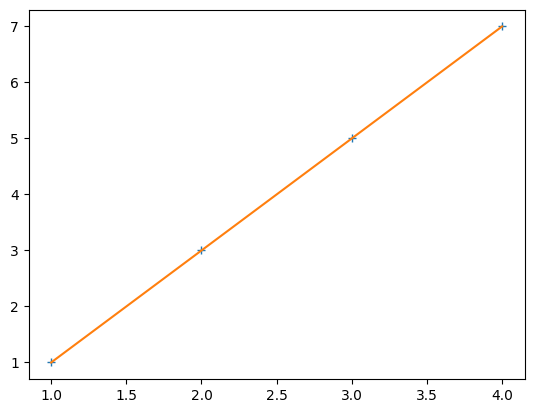

In [36]:
plt.plot(x, y, '+')
plt.plot(x, model.predict(x))
plt.show

In [38]:
result = model.predict([[5]])
print(result)

[[9.]]


## Another exercise of multiple regression
# Decision tree is a useful tool for dealing with non-linear relationships among varibales (continuous and categorical)

In [39]:
years_of_experience = np.array([[0], [1], [2], [3], [4], [6], [8], [10]])
salaries = np.array([[30000], [40000], [55000], [60000], [70000], [80000], [85000], [87000]])

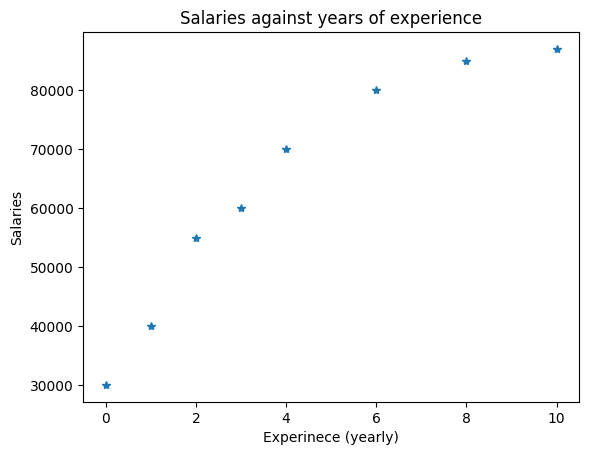

In [40]:
plt.plot(years_of_experience, salaries, '*')
plt.title("Salaries against years of experience")
plt.xlabel("Experinece (yearly)")
plt.ylabel("Salaries")
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
model = DecisionTreeRegressor(max_depth = 2)
model.fit(years_of_experience, salaries)

DecisionTreeRegressor(max_depth=2)

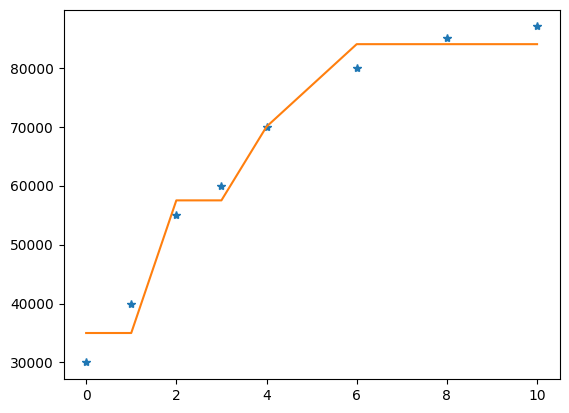

In [43]:
yhat = model.predict(years_of_experience)
plt.plot(years_of_experience, salaries, '*')
plt.plot(years_of_experience, yhat, '-')
plt.show()

Increasing max_depth improves the precision of the model. Trying for max_depth=4

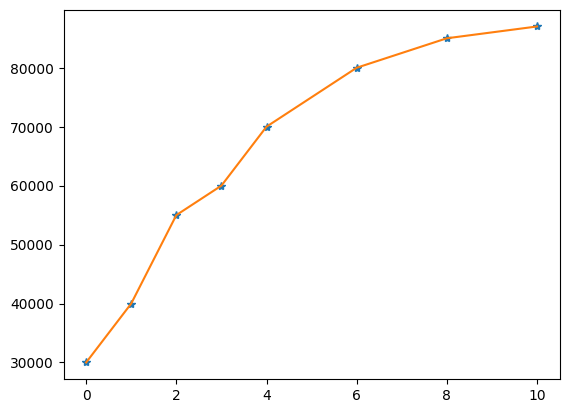

In [45]:
model = DecisionTreeRegressor(max_depth = 4)
model.fit(years_of_experience, salaries)
yhat = model.predict(years_of_experience)
plt.plot(years_of_experience, salaries, '*')
plt.plot(years_of_experience, yhat, '-')
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(salaries, yhat)
R2 = r2_score(salaries, yhat)
print(f"Mean Square Error: {MSE}")
print(f"R2: {R2}")

Mean Square Error: 0.0
R2: 1.0


## Be careful of "OVER FITTING" in Decision Tree models 

## Performnace Evaluation - Confusion matrix: used only for categorical (including binary) classification problems and cannot be used for regression models. 

In [46]:
y_true = [1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
y_predict = [1, 1, 0, 0, 1, 0, 0, 0, 1, 1]

In [49]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_predict)
print(acc * 100)

100.0


In [50]:
from sklearn.metrics import precision_score
pr = precision_score(y_true, y_predict)
print(pr * 100)

100.0


In [51]:
from sklearn.metrics import recall_score
r = recall_score(y_true, y_predict)
print(r * 100)

100.0


## We get 100% for all precision, recall, and accuracy, because y_predict is exactly y_true. However, if we change y_predict, we will get lower scores. 

In [55]:
y_true = [1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
y_predict = [1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_predict)
print(acc * 100)
from sklearn.metrics import precision_score
pr = precision_score(y_true, y_predict)
print(pr * 100)
from sklearn.metrics import recall_score
r = recall_score(y_true, y_predict)
print(r * 100)

90.0
83.33333333333334
100.0


# In this exercise, recall score has not been changed. However, both precision and accuracy have declined highlighting that the model FT error. 

## Classification 

In [57]:
df = pd.read_csv(r"C:\Users\golna\OneDrive\Desktop\Personal Projects\diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Pre-processing data

In [61]:
df.shape
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [71]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [72]:
x = np.array(x)
y = np.array(y)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Naive Bayes Algorithim

In [87]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [88]:
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, yhat_train)
acc_test = accuracy_score(y_test, yhat_test)
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cf_train = confusion_matrix(y_train, yhat_train)
cf_test = confusion_matrix(y_test, yhat_test)
p_train = precision_score(y_train, yhat_train)
p_test = precision_score(y_test, yhat_test)
r_train = recall_score(y_train, yhat_train)
r_test = recall_score(y_test, yhat_test)
print(f"Training Accuracy: {acc_train}")
print(f"Test Accuracy: {acc_test}")
print(f"Training Confusion Matrix: {cf_train}")
print(f"Test Confusion Matrix: {cf_test}")
print(f"Training Precision: {p_train}")
print(f"Test Precision: {p_test}")
print(f"Training Recall Score: {r_train}")
print(f"Test Recall Score: {r_test}")

Training Accuracy: 0.760586319218241
Test Accuracy: 0.7597402597402597
Training Confusion Matrix: [[330  63]
 [ 84 137]]
Test Confusion Matrix: [[88 19]
 [18 29]]
Training Precision: 0.685
Test Precision: 0.6041666666666666
Training Recall Score: 0.6199095022624435
Test Recall Score: 0.6170212765957447


# K-Nearest Neighbors (KNN) Algorithm

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [91]:
yhat_train = knn.predict(x_train)
yhat_test = knn.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
acc_train = accuracy_score(y_train, yhat_train)
acc_test = accuracy_score(y_test, yhat_test)
p_train = precision_score(y_train, yhat_train)
p_test = precision_score(y_test, yhat_test)
r_train = recall_score(y_train, yhat_train)
r_test = recall_score(y_test, yhat_test)
print(f"Accuracy TRain Score: {acc_train}")
print(f"Accuracy Test Score: {acc_test}")
print(f"Precision Train Score: {p_train}")
print(f"Precision Test Score: {p_test}")
print(f"Recall Train Score: {r_train}")
print(f"Recall Test Score: {r_test}")
cf_test = confusion_matrix(y_test, yhat_test)
print(f"Confusion Matrix of Predictions: {cf_test}")

Accuracy TRain Score: 0.8208469055374593
Accuracy Test Score: 0.7662337662337663
Precision Train Score: 0.8881118881118881
Precision Test Score: 0.72
Recall Train Score: 0.5746606334841629
Recall Test Score: 0.3829787234042553
Confusion Matrix of Predictions: [[100   7]
 [ 29  18]]


# Precision score in the train data is better than in the test data. The KNN model predicted 29 FN cases and 7 TF cases. Overall, 100 cases were predicted TP and 18 cased were predicted TN. Comparing two algorithms, we see that KNN is working better "on this dataset" rather than Naive-Bayes algorithm in terms of "recall and precision scores". 

## Random Forest Algorithm (composition of different decision trees)

In [92]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=4, min_samples_leaf=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)a

RandomForestClassifier()

In [104]:
from sklearn.metrics import accuracy_score
yhat_train_dt = dt.predict(x_train)
yhat_test_dt = dt.predict(x_test)
acc_train_dt = accuracy_score(y_train, yhat_train_dt)
acc_test_dt = accuracy_score(y_train, yhat_train_dt)
yhat_train_rf = rf.predict(x_train)
yhat_test_rf = rf.predict(x_test)
acc_train_rf = accuracy_score(y_train, yhat_train_rf)
acc_test_rf = accuracy_score(y_test, yhat_test_rf)
result1 = print(acc_train_dt, acc_train_rf)
result2 = print(acc_test_dt, acc_test_rf)

0.8925081433224755 1.0
0.8925081433224755 0.7792207792207793


# Decision Tree is working better in the tests. While in the training, random forest is working better in terms of "Accuracy"

In [105]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix
r_test_dt = recall_score(y_test, yhat_test_dt)
r_test_rf = recall_score(y_test, yhat_test_rf)
result3 = print(r_test_dt, r_test_rf)
p_test_dt = precision_score(y_test, yhat_test_dt)
p_test_rf = precision_score(y_test, yhat_test_rf)
result4 = print(p_test_dt, p_test_rf)
cf_test_dt = confusion_matrix(y_test, yhat_test_dt)
cf_test_rf = confusion_matrix(y_test, yhat_test_rf)
result5 = print(cf_test_dt, cf_test_rf)

0.6595744680851063 0.6170212765957447
0.5636363636363636 0.6444444444444445
[[83 24]
 [16 31]] [[91 16]
 [18 29]]
